# Low-rank Tensor Regression

Tensor regression is available in the module `tensorly.regression`.

Given a series of $N$ tensor samples/observations, $\tilde X_i, i={1, \cdots, N}$, and corresponding labels $y_i, i={1, \cdots, N}$, we want to find the weight tensor $\tilde W$ such that, for each $i={1, \cdots, N}$:

$$
   y_i = \langle \tilde X_i, \tilde W \rangle
$$

We additionally impose that $\tilde W$ be a rank-r CP decomposition (Kruskal regression) or a rank $(r_1, \cdots, r_N)$-Tucker decomposition (Tucker regression).

TensorLy implements both types of tensor regression as scikit-learn-like estimators.

For instance, Krusal regression is available through the $tensorly.regression.KruskalRegression$ object. This implements a fit method that takes as parameters $X$, the data tensor which first dimension is the number of samples, and $y$, the corresponding vector of labels.

Given a set of testing samples, you can use the predict method to obtain the corresponding predictions from the model.



In [1]:
import matplotlib.pyplot as plt
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.random import check_random_state
from tensorly.regression.kruskal_regression import KruskalRegressor
import tensorly.backend as T

#show figures in the notebook
%matplotlib inline

In [2]:
# Parameter of the experiment
image_height = 25
image_width = 25

# fix the random seed for reproducibility
rng = check_random_state(1) 

# Generate a random tensor
X = T.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=1))

Generate the original image

In [3]:
weight_img = gen_image(region='swiss', image_height=image_height, image_width=image_width)
weight_img = T.tensor(weight_img)

The true labels is obtained by taking the product between the true regression weights and the input tensors

In [4]:
y = T.dot(partial_tensor_to_vec(X, skip_begin=1), tensor_to_vec(weight_img))

## Let's view the true regression weight 

Text(0.5, 1.0, 'True regression weights')

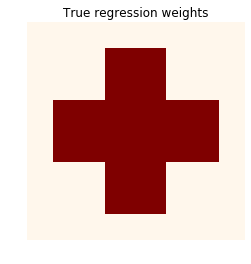

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(T.to_numpy(weight_img), cmap=plt.cm.OrRd, interpolation='nearest')
ax.set_axis_off()
ax.set_title('True regression weights')

## Tensor regression 

### Create a tensor Regressor estimator

In [6]:
estimator = KruskalRegressor(weight_rank=2, tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)

### Fit the estimator to the data

In [7]:
estimator.fit(X, y)

### Predict the labels given input tensors

In [8]:
estimator.predict(X)

array([ 1.26573782e+00, -2.83213723e+00, -2.06956103e+01, -4.53729371e+00,
       -1.65466154e+01, -2.85602495e+01,  1.06794852e+01,  3.31600013e+01,
       -3.90996358e+00, -2.81792451e+01,  1.32247325e+01, -4.01945577e+00,
       -2.97544589e+00,  3.22827961e+01,  6.49267863e+00, -5.59805876e+00,
        3.91032927e+00,  2.80456043e+01,  1.25606455e+01,  8.20993472e+00,
       -2.29545042e+01,  1.15002243e+01,  1.32456267e+01,  1.09970167e+01,
       -1.79696138e+01, -6.99621043e-03,  2.47792712e+01, -2.01705443e+01,
        2.86083461e-02, -1.50911473e+01,  9.07476150e+00, -2.37076897e+01,
       -6.78099254e+00, -1.25386165e+01, -5.02552451e+00, -7.85617374e+00,
       -2.24890659e+01, -1.91881416e+01,  2.30193483e+01, -2.01272799e+01,
       -1.98991794e+01,  3.65636770e+00,  7.83416531e+00,  5.58344619e+00,
       -5.21122417e+00, -6.78607675e+00, -1.54218671e+01, -1.79126588e+01,
        7.00976014e+00, -1.02208603e+01,  2.07292222e+01, -4.25044486e+00,
        1.28878146e+01, -

### Visualise the learned weights

Text(0.5, 1.0, 'Learned regression weights')

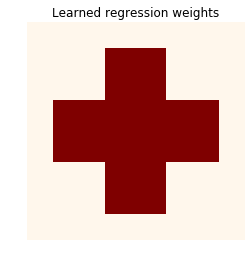

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(T.to_numpy(estimator.weight_tensor_), cmap=plt.cm.OrRd, interpolation='nearest')
ax.set_axis_off()
ax.set_title('Learned regression weights')

Wait! Weren't the learned weights supposed to be a low rank tensor in the Krusakl form!?

They are! We simply plot the full tensor corresponding to the learned decomposition. You can access the decomposed form as follows:

In [10]:
factors = estimator.kruskal_weight_